In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])


#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 1.5414 - accuracy: 0.2078
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 1.4343 - accuracy: 0.2861
Epoch 3/100
29/29 [==============================] - 0s 985us/step - loss: 1.3754 - accuracy: 0.3333
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 1.3281 - accuracy: 0.3711
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2796 - accuracy: 0.4078
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2215 - accuracy: 0.4528
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1519 - accuracy: 0.4967
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 1.0744 - accuracy: 0.5439
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9951 - accuracy: 0.5767
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.6128
Epoch 1

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [ ]:
pred

[3,
 0,
 2,
 1,
 3,
 0,
 0,
 2,
 3,
 1,
 0,
 3,
 0,
 2,
 3,
 0,
 3,
 2,
 2,
 0,
 0,
 0,
 3,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 1,
 0,
 2,
 0,
 2,
 3,
 0,
 0,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 0,
 2,
 2,
 2,
 0,
 3,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 1,
 3,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 0,
 0,
 0,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 0,
 1,
 2,
 1,
 3,
 0,
 3,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 3,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 3,
 3,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0]

In [ ]:
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 90.0


In [ ]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 1.4725 - accuracy: 0.2678 - val_loss: 1.4230 - val_accuracy: 0.2950
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3840 - accuracy: 0.2972 - val_loss: 1.3680 - val_accuracy: 0.3250
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3312 - accuracy: 0.3300 - val_loss: 1.3211 - val_accuracy: 0.3550
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2818 - accuracy: 0.3822 - val_loss: 1.2751 - val_accuracy: 0.3800
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2291 - accuracy: 0.4300 - val_loss: 1.2183 - val_accuracy: 0.4500
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1661 - accuracy: 0.4872 - val_loss: 1.1524 - val_accuracy: 0.5200
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0941 - accuracy: 0.5328 - val_loss: 1.0723 - val_accuracy: 0.5750
Epoch 8/100
2

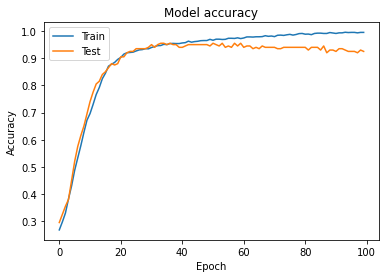

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

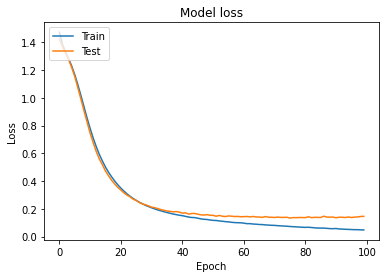

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()